Name : Krushna Phapale

Task 5 : SALES PRICE PREDICTION

College : P.E.S Modern College of Engineering

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Advertising.csv to Advertising.csv


In [3]:
df = pd.read_csv('/content/Advertising.csv')


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Dimention Of DataSet 
df.shape 

(200, 5)

In [6]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
# Stat About Data
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
# Import MATPLOTlib library
import matplotlib.pyplot as plt
import seaborn as sns

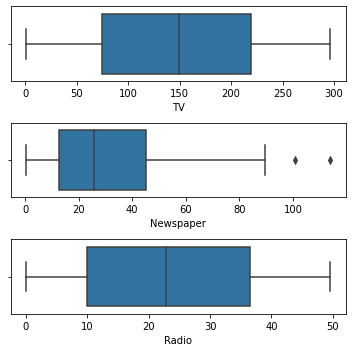

In [12]:
# Plotting The Point of Data
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

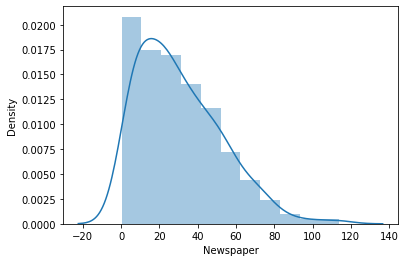

In [13]:
#Displot
sns.distplot(df['Newspaper'])

In [14]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [15]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [16]:
data = df.copy()

In [17]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

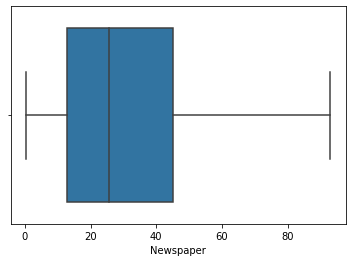

In [18]:
# Newspaper
sns.boxplot(data['Newspaper'])

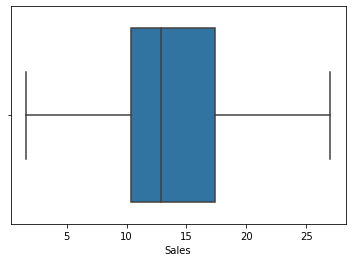

In [19]:
# Sales
sns.boxplot(data['Sales']);

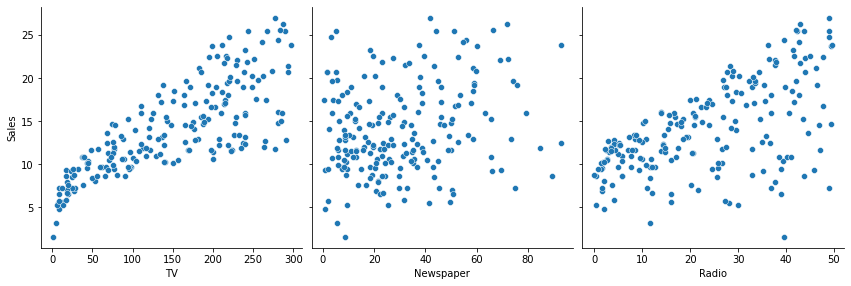

In [21]:
# Scatter Points
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

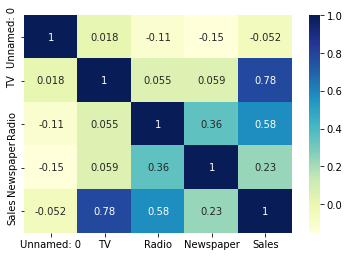

In [22]:
# CREATING HeatMap
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [24]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [25]:
print(important_features)

['TV', 'Radio', 'Sales']


In [26]:
X = data['TV']
y = data['Sales']

In [27]:
X = X.values.reshape(-1,1)

In [28]:
# lENGTH OF X
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [29]:
# LENGTH OF Y
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [31]:
# dIMENTION OF DATAFRAME
print(X.shape,y.shape)

(200, 1) (200,)


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [33]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [34]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [36]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

In [37]:
# KNeighborsRegressor
print(knn_train_pred, knn_test_pred)

[11.22 11.22  9.14 11.92 11.92 18.32 10.34 21.4   7.18 13.66 20.52 16.02
  5.92  5.12 10.18 15.   17.34 10.5  19.16  9.78 11.68 17.16 10.2   6.56
  9.78  7.38 11.24  7.72  9.34  6.56 18.78 13.14 10.18  7.7  15.06 10.34
 18.86 18.32 14.52 17.14 19.88 18.34 16.02 19.16 11.92  5.92 18.72 19.08
  9.34 19.64 12.58 10.34 17.74 18.44  7.7  18.62  7.72 17.58 15.9  18.86
 18.44 11.68 16.02 16.56  9.78  7.18 10.2  16.84 18.72 21.4  16.8  14.12
 14.76  8.34  6.32 15.06 13.1  10.34  7.72 18.34 11.72 11.22 16.02  7.7
 11.68 17.74  5.12 13.   12.78  7.18 13.28 10.18  7.18 13.28 11.68 15.06
 16.8  18.18 10.2  13.    9.42 15.54 14.12 10.2  17.34 19.16  9.78 13.84
 16.56 12.58  6.32 20.26 19.64 18.72 19.88 11.8  11.22 18.86  6.04 19.88
 11.22 11.98 11.92 14.12 18.62 15.06 17.14 12.92 17.58 15.06 17.74 18.72
 16.02 19.38] [17.74 13.14 16.02 11.68  9.52 18.32 19.16 17.74  7.7   7.56 15.54 10.18
 14.66 16.44 11.68 18.78 11.68 14.98 14.12 18.78 18.12 16.02 15.06 13.14
 10.34 19.88  7.7  15.22  5.92 19.32 1

In [39]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [40]:
# K-Nearest Neighbors
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.43064658638484776
RMSE: 3.9279248897342653


In [41]:
# HEAD OF DATA START FROM 0
Results.head() 

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.69095,0.430647,3.927925,0.260303


In [42]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [43]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [44]:
# PRINT SALE PREDICTION
print(svr_train_pred,svr_test_pred)

[10.59453383 11.28178423  8.74650466 12.18901643 12.04895846 17.36958158
  9.76489225 16.65263457  7.39670042 13.0645191  17.13596639 17.62754841
  7.14002212  7.08584991 11.08907852 17.40096624 15.31712687 10.8186528
 16.79586973 10.99648854 10.13515621 15.64491249  8.38576783  7.23198255
  8.15021251  7.35235143 11.38660842  7.33261237  9.07534216  7.2297397
 17.29618377 13.71252974 11.06598853  7.60784258 14.70772908  9.64432501
 17.61143818 17.37446167 12.71656027 16.8831313  16.12962827 16.99196516
 17.63777593 16.81517992 12.22667745  7.13083256 17.52413417 16.51554002
  9.14473125 17.20017454 11.7093143   9.83778821 16.56460593 17.58023187
  7.68079408 16.52117971  7.32434243 15.77672582 17.43863694 17.586863
 17.55300301 10.06919747 17.63710047 17.3521887   8.21279426  7.37862896
  8.46163441 17.29987225 17.50447019 16.58264367 15.93985704 13.19121074
 12.87831545  7.72463936  7.14481238 14.63592504 13.57236878  9.75444676
  7.33261237 17.03797634  9.98232429 10.71912943 17.637

In [45]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.41393815535531
RMSE: 3.9851432208608704


In [46]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.690950,0.430647,3.927925,0.260303
1,Support Vector Machine,0.622718,0.413938,3.985143,0.208780


In [47]:
import statsmodels.api as sm

In [48]:
X_train_constant = sm.add_constant(X_train)

In [49]:
model = sm.OLS(y_train, X_train_constant).fit()

In [50]:
model.params

const    6.860681
x1       0.047178
dtype: float64

In [51]:
# sUMMARY OF DATASET ANALYSIS
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     240.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.62e-31
Time:                        19:37:59   Log-Likelihood:                -339.28
No. Observations:                 134   AIC:                             682.6
Df Residuals:                     132   BIC:                             688.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8607      0.501     13.681      0.0

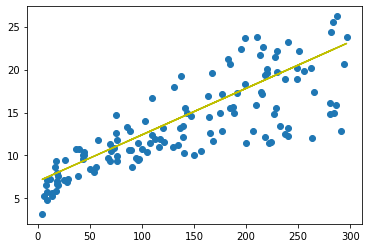

In [52]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [53]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

161    2.396185
51    -0.897328
170   -0.819569
7      0.668553
164   -0.489914
         ...   
95     2.335192
70     2.046228
124    2.012024
21    -5.560680
198    5.259708
Name: Sales, Length: 134, dtype: float64

In [54]:
y_train_pred

array([10.90381468, 11.59732765,  9.21956892, 12.53144715, 12.38991389,
       19.26371244, 10.12538176, 20.27331635,  7.77592969, 13.36649337,
       16.93313146, 18.06067975,  7.25697441,  7.05411007, 11.39918108,
       17.35301346, 15.21114349, 11.12555012, 20.10347644, 11.30482558,
       10.46506158, 15.47533891,  8.88932465,  7.48342762,  8.66287143,
        7.70516306, 11.70583648,  7.67213863,  9.51207098,  7.47870984,
       17.16902023, 13.92790862, 11.37559221,  8.06843175, 14.72993042,
       10.01687293, 18.57963503, 19.25427689, 13.04568465, 16.6217583 ,
       20.84416715, 16.74913823, 18.18805968, 20.07988756, 12.56918935,
        7.22866776, 17.6313622 , 20.42900293,  9.57340206, 17.02276919,
       12.04079852, 10.19143062, 16.28679625, 17.81063766,  8.15806948,
       16.24433628,  7.6579853 , 15.58384774, 17.42849787, 18.69757941,
       17.71628216, 10.40373051, 18.17390636, 17.26337573,  8.72420251,
        7.74762303,  8.96009128, 19.39109237, 17.57946667, 20.35

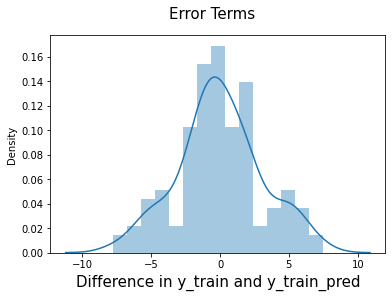

In [55]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

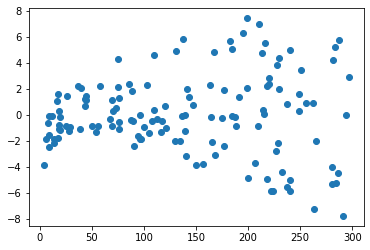

In [56]:
plt.scatter(X_train, res)
plt.show()

In [57]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [58]:
y_pred

array([17.08881805, 14.0081108 , 18.26354409, 10.41316606,  9.67247534,
       19.18822804, 19.92420098, 16.28679625,  8.04484288,  7.9835118 ,
       15.14981242, 11.46051216, 14.89033478, 16.48966059, 10.46034381,
       17.16430245, 10.64433704, 17.51341782, 13.44197777, 15.97542309,
       20.52807621, 18.15031748, 14.57424383, 13.92319085, 10.08763956,
       20.67904502,  8.12504506, 14.9422303 ,  7.20507888, 15.99901196,
       12.66826263, 16.1830052 , 18.09842195, 11.29067225,  6.89370571,
       12.79092479, 10.05933291, 14.99884361, 13.23911344, 19.37222127,
        9.13936674, 12.54560047, 18.18805968, 16.61704052, 19.91476543,
       18.33431072, 19.77323217, 10.54998154, 17.25394018, 12.0832585 ,
       15.39041895,  8.34678049, 16.92841369, 15.725381  , 16.1830052 ,
       17.35301346, 16.80103376, 17.92386427, 13.0739913 ,  9.79985527,
       18.83439489, 16.41417618, 19.45242345,  9.97913073, 16.53212057,
        8.65343588])

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.634037844754231

In [61]:
r2 = r2_score(y_test, y_pred)
r2

0.5126572931474087

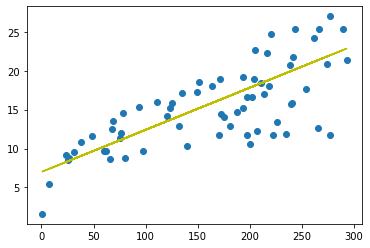

In [62]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()